In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#from sklearn.model_selection import train_test_split 
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.naive_bayes import MultinomialNB

In [57]:
data1=pd.read_csv("./deteccion_spam/datos/enronSpamSubset.csv")
data2=pd.read_csv("./deteccion_spam/datos/lingSpam.csv")
data3=pd.read_csv("./deteccion_spam/datos/completeSpamAssassin.csv")

In [10]:
data3.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


## Desbalanceo de clases

In [27]:
#Función para visualizar la distribución de las clases (para ver si hay desbalanceo)
def distribucion(data, title):
    #Calculo la cantidad de correos electrónicos en cada clase
    class_distribution = data['Label'].value_counts()
    class_distribution = class_distribution.sort_index() #Simplemente para que la clase 0 aparezca primero
    
    # Visualizar la distribución de las clases
    plt.figure(figsize=(8, 6))
    class_distribution.plot(kind='bar', color= ['#45D2EB', '#FF5733'])
    plt.title(title)
    plt.xlabel('Clase')
    plt.ylabel('Cantidad de Correos Electrónicos')
    plt.xticks(rotation=0)
    plt.show()

    print(class_distribution)

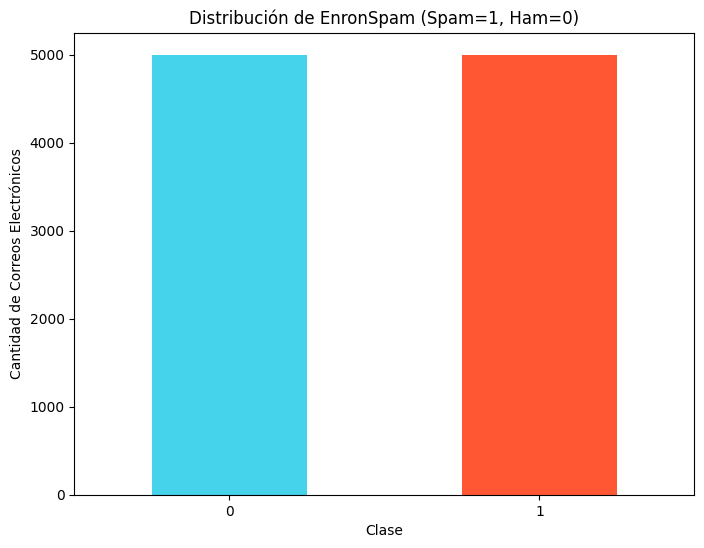

Label
0    5000
1    5000
Name: count, dtype: int64


In [45]:
distribucion(data1, "Distribución de EnronSpam (Spam=1, Ham=0)")

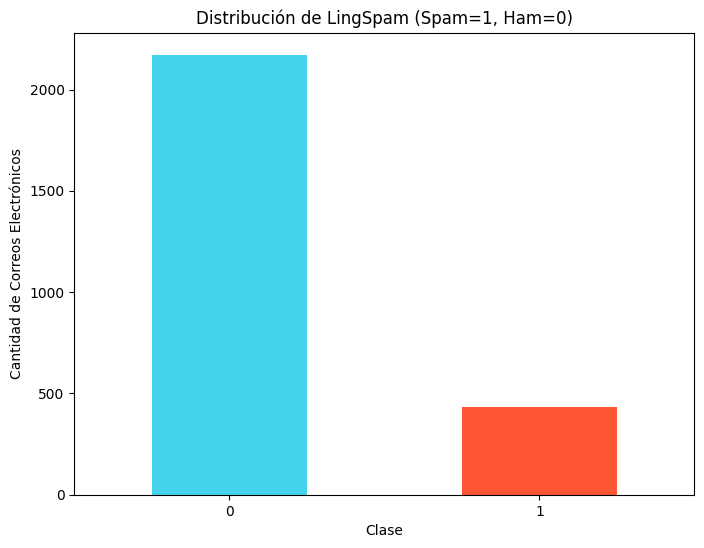

Label
0    2172
1     433
Name: count, dtype: int64


In [29]:
distribucion(data2, "Distribución de LingSpam (Spam=1, Ham=0)")

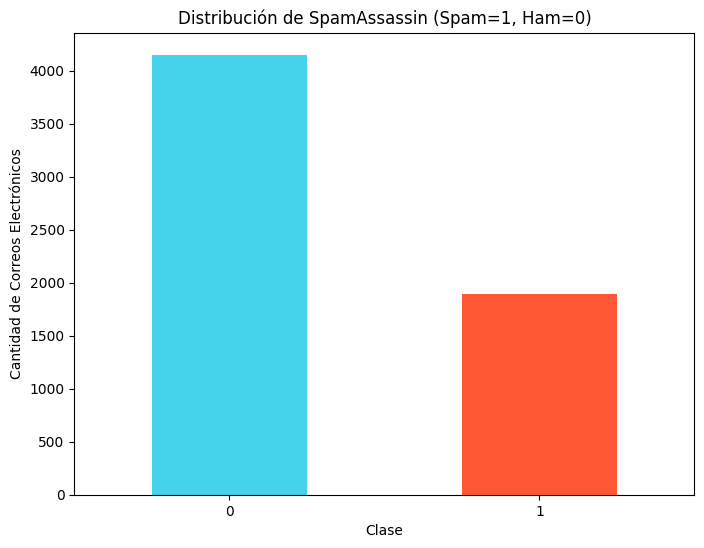

Label
0    4150
1    1896
Name: count, dtype: int64


In [30]:
distribucion(data3, "Distribución de SpamAssassin (Spam=1, Ham=0)")

Clases bastante desbalanceadas, necesitamos aplicar una técnica de balanceo

In [43]:
#pip install imbalanced-learn
#!pip install -U scikit-learn imbalanced-learn
#!pip uninstall scikit-learn imbalanced-learn
!pip install -U scikit-learn imbalanced-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/e9/3e4879974a7c4dcaca2a746dde3df08d0ae8f14c74b03591616ce5f0a8b1/scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
Using cached scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl (10.6 MB)
Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
  

In [44]:
from imblearn.over_sampling import RandomOverSampler

# Separa las características y las etiquetas
X = data2.drop('Label', axis=1)  # características
y = data2['Label']  # etiquetas

# Aplico el sobremuestreo
oversample = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Concatena las características y las etiquetas en un nuevo DataFrame
data_resampled2 = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Label'])], axis=1)

# Ahora 'data_resampled' contiene el conjunto de datos con clases balanceadas

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\monic\anaconda3\Lib\site-packages\imblearn\utils\_validation.py)

## Longitud de los correos
Queremos estudiar si hay relación entre el número de palabras que tiene un correo y su clase.

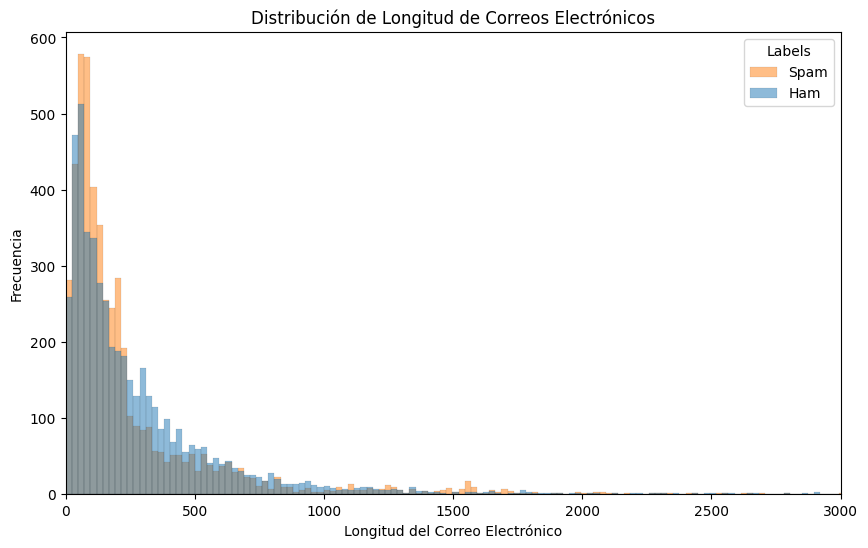

In [74]:
#Función que devuelve el número de palabras que tiene un correo
def num_words(email):
    return len(email.split())

def distribucion_longitud(data):
    #Aplico la función num_words a cada fila de la columna "Body" y guardo el resultado en una nueva columna "n_words"
    data1["n_words"] = data1["Body"].apply(num_words)
    data1.head()
    
    plt.figure(figsize=(10, 6))
    plt.title("Distribución de Longitud de Correos Electrónicos")
    sns.histplot(data=data, x="n_words", hue="Label")
    plt.xlabel('Longitud del Correo Electrónico')
    plt.ylabel('Frecuencia')
    plt.xlim(0, 3000)
    plt.legend(title="Labels", labels={"Spam":1, "Ham":0})
    plt.show()
    
distribucion_longitud(data1)

Observamos que los correos de Spam suelen tener ligeramente menor número de palabras.

### Selección de características